<a href="https://colab.research.google.com/github/Pramitreddy17/ML/blob/main/practical_5_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
file_path = "Wholesale customers data.csv"
df = pd.read_csv(file_path)

X = df.iloc[:, 2:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(df.head())
print(df.tail())
print(df.shape)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
435        2204  
436        2346  
437        1867  
438        2125

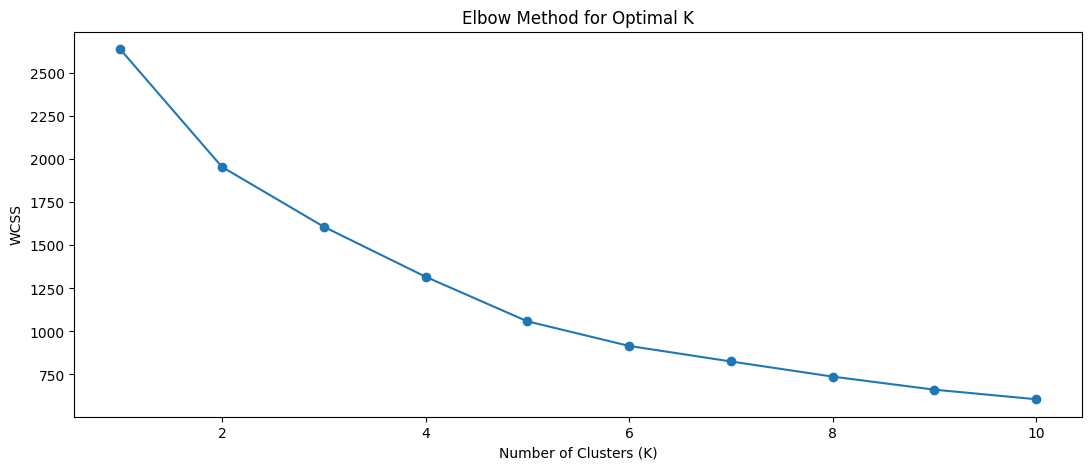

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(13, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


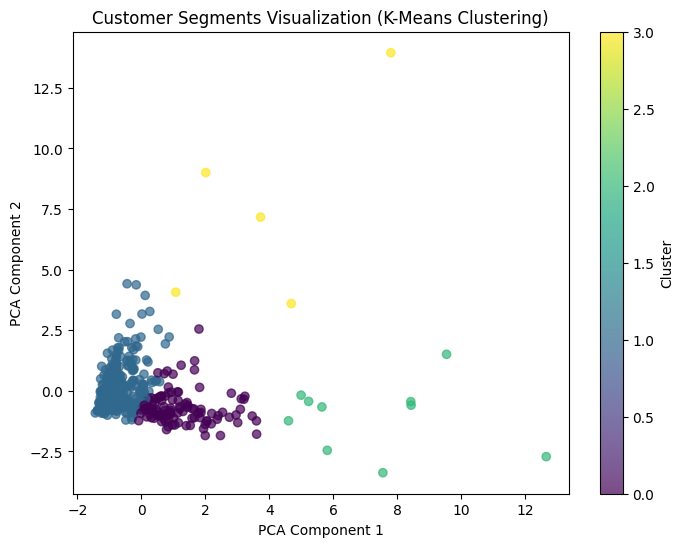

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualization (K-Means Clustering)')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)


cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_df.index = [f'Cluster {i}' for i in range(optimal_k)]


print(cluster_df)


                  Fresh          Milk       Grocery        Frozen  \
Cluster 0   5591.436364  10113.027273  15637.390909   1499.918182   
Cluster 1  13504.987302   3044.539683   3844.444444   3271.425397   
Cluster 2  15964.900000  34708.500000  48536.900000   3054.600000   
Cluster 3  50270.600000  26361.800000  16416.000000  25122.800000   

           Detergents_Paper    Delicassen  
Cluster 0       6711.354545   1759.090909  
Cluster 1        852.320635   1127.107937  
Cluster 2      24875.200000   2942.800000  
Cluster 3       2475.000000  18595.200000  
